In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (8,6)

### Receipts

In [2]:
receipts = pd.read_json('data/receipts.json',lines=True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [3]:
# Clean the id field and the date fields; change those columns to datatime type
receipts['_id'] = receipts['_id'].apply(lambda x:x['$oid'])

def date_processor(x):
    return pd.to_datetime(x['$date'],unit='ms').date() if pd.notna(x) else x

date_col = ['createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate']
for i in date_col:
    receipts[i] = receipts[i].apply(lambda x: date_processor(x))
    
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,500.0,2021-01-03,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,150.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,NaN,2021-01-03,NaN,5.0,2021-01-03,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-03,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [4]:
# Write a function to explore the summary statistics of those numeric fields, including 
# precentage of populated (not null), minimum, maximum, mean, std and precentage of zeros
# (Under some scenarios, zero might represent missing values.)

def numeric_column_summary(data,columns):
    df = pd.DataFrame()
    df['columns'] = columns
    df['% populated'] = df['columns'].apply(lambda x: data[x].count()/len(data) * 100)
    df['Min'] = df['columns'].apply(lambda x: data[x].min())
    df['Max'] = df['columns'].apply(lambda x: data[x].max())
    df['Mean'] = df['columns'].apply(lambda x: data[x].mean())
    df['Std'] = df['columns'].apply(lambda x: data[x].std())
    df['% zero'] = df['columns'].apply(lambda x: len(data[data[x] == 0]) * 100 /len(data[x]))
    pd.options.display.float_format = '{:.2f}'.format
    return df

In [5]:
# Write a function to explore the summary statistics of those categorical fields, including 
# precentage of populated (not null), number of unique values and the most common value

def categorical_column_summary(data,columns):
    df = pd.DataFrame()
    df['columns'] = columns
    df['% Populated'] = df['columns'].apply(lambda x: data[x].count()/len(data) * 100)
    df['# Unique Values'] = df['columns'].apply(lambda x: data[x].nunique())
    df['Most Common Value'] = df['columns'].apply(lambda x: data[x].value_counts().index[0])
    pd.options.display.float_format = '{:.2f}'.format
    return df

In [6]:
numeric_column_summary(receipts,['bonusPointsEarned','pointsEarned','purchasedItemCount','totalSpent'])

,columns,% populated,Min,Max,Mean,Std,% zero
0,bonusPointsEarned,48.61,5.00,750.00,238.89,299.09,0.00
1,pointsEarned,54.42,0.00,10199.80,585.96,1357.17,0.36
2,purchasedItemCount,56.75,0.00,689.00,14.76,61.13,1.34
3,totalSpent,61.13,0.00,4721.95,77.80,347.11,1.34


In [7]:
categorical_column_summary(receipts, ['_id', 'bonusPointsEarnedReason','rewardsReceiptStatus', 'userId'])

,columns,% Populated,# Unique Values,Most Common Value
0,_id,100.00,1119,5ff1e1eb0a720f0523000575
1,bonusPointsEarnedReason,48.61,9,All-receipts receipt bonus
2,rewardsReceiptStatus,100.00,5,FINISHED
3,userId,100.00,258,5fc961c3b8cfca11a077dd33


For receipts data, we could notice that points, item count and total spent, which are necessary components of receipts are not highly populated and have many values missing. There are also some outliers for these fields and needs further investigation.

### Items

In [8]:
# Extract 'rewardsReceiptItemList' column from receipts data and create a new table named items

dict_list = []
for i in range(len(receipts)):
    if type(receipts['rewardsReceiptItemList'].iloc[i]) == list:
        for j in receipts['rewardsReceiptItemList'].iloc[i]:
            j['receiptId'] = receipts['_id'].iloc[i]
            dict_list.append(j)            
items = pd.DataFrame.from_dict(dict_list)
receipts = receipts.drop(columns=['rewardsReceiptItemList'])

In [9]:
items.head().transpose()

,0,1,2,3,4
barcode,4011,4011,028400642255,NaN,4011
description,ITEM NOT FOUND,ITEM NOT FOUND,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,NaN,ITEM NOT FOUND
finalPrice,26.00,1,10.00,NaN,28.00
itemPrice,26.00,1,10.00,NaN,28.00
needsFetchReview,False,NaN,True,False,False
partnerItemId,1,1,2,1,1
preventTargetGapPoints,True,NaN,True,True,True
quantityPurchased,5.00,1.00,1.00,NaN,4.00
userFlaggedBarcode,4011,NaN,028400642255,4011,4011
userFlaggedNewItem,True,NaN,True,True,True


In [10]:
# Take a look at numeric fields

num_col = ['finalPrice','itemPrice','quantityPurchased','userFlaggedPrice','userFlaggedQuantity',
           'discountedItemPrice','originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
           'originalFinalPrice','originalMetaBriteItemPrice','priceAfterCoupon','preventTargetGapPoints',
           'needsFetchReview','userFlaggedNewItem','competitiveProduct','deleted']
items[num_col] = items[num_col].astype(float)
numeric_column_summary(items,num_col)

,columns,% populated,Min,Max,Mean,Std,% zero
0,finalPrice,97.49,0.00,441.58,7.87,14.66,0.06
1,itemPrice,97.49,0.00,441.58,7.87,14.66,0.06
2,quantityPurchased,97.49,1.00,17.00,1.39,1.20,0.00
3,userFlaggedPrice,4.31,1.00,29.00,22.78,9.28,0.00
4,userFlaggedQuantity,4.31,1.00,5.00,1.87,1.31,0.00
5,discountedItemPrice,83.11,0.16,441.58,7.66,15.46,0.00
6,originalMetaBriteQuantityPurchased,0.22,1.00,2.00,1.20,0.41,0.00
7,pointsEarned,13.36,4.50,870.00,140.51,223.01,0.00
8,targetPrice,5.45,77.00,800.00,648.90,294.35,0.00
9,originalFinalPrice,0.13,1.00,10.00,4.00,4.50,0.00


In [11]:
# Take a look at categorical fields

categorical_column_summary(items,['barcode','description','partnerItemId','userFlaggedBarcode', 'receiptId',
                                  'needsFetchReviewReason','pointsNotAwardedReason','pointsPayerId','rewardsGroup',
                                  'rewardsProductPartnerId','userFlaggedDescription','originalMetaBriteBarcode', 
                                  'originalMetaBriteDescription', 'brandCode','competitorRewardsGroup',
                                 'originalReceiptItemText', 'itemNumber','metabriteCampaignId'])

,columns,% Populated,# Unique Values,Most Common Value
0,barcode,44.52,568,4011
1,description,94.51,1889,ITEM NOT FOUND
2,partnerItemId,100.00,916,1
3,userFlaggedBarcode,4.86,6,034100573065
4,receiptId,100.00,679,600f2fc80a720f0535000030
5,needsFetchReviewReason,3.16,2,USER_FLAGGED
6,pointsNotAwardedReason,4.90,1,Action not allowed for user and CPG
7,pointsPayerId,18.25,15,559c2234e4b06aca36af13c6
8,rewardsGroup,24.94,182,BEN AND JERRYS ICE CREAM
9,rewardsProductPartnerId,32.69,16,559c2234e4b06aca36af13c6


In [12]:
items.shape

(6941, 35)

In [13]:
items[['receiptId','partnerItemId']].value_counts()

receiptId                 partnerItemId
5f9c74f70a7214ad07000037  1                1
600eda0c0a7214ada200001e  1057             1
                          1099             1
                          1085             1
                          1083             1
                                          ..
6004a5f20a7214ad4c000088  1285             1
                          1284             1
                          1283             1
                          1281             1
603d5d6c0a7217c72c000463  1                1
Length: 6941, dtype: int64

The first thing I want to do with the new table is to identify a primary key. partnerItemId	and receiptId are the only two fields that 100% populated. From the basic statistics and logical reasoning, we could tell that a combination of partnerItemId and receiptId can serve as unique identifier for each record. However, we need more info for the partnerItemId data. Besides, a lot of data are missing for most fields.

### Users

In [14]:
users = pd.read_json('data/users.json',lines=True)
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [15]:
# clean the id and date fields
users['_id'] = users['_id'].apply(lambda x:x['$oid'])
users['createdDate'] = users['createdDate'].apply(lambda x: date_processor(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x: date_processor(x))
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03,2021-01-03,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03,2021-01-03,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03,2021-01-03,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03,2021-01-03,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03,2021-01-03,consumer,Email,WI


In [16]:
# From the first few rows, we could notice there are duplicate records for the same user.
# After looking into the data, only 212 records are unique and I deduped them.

print(len(users))
print(len(users.drop_duplicates()))
users = users.drop_duplicates()

495
212


In [17]:
# Take a look at numeric fields

numeric_column_summary(users,['active'])

,columns,% populated,Min,Max,Mean,Std,% zero
0,active,100.00,False,True,1.00,0.07,0.47


In [18]:
# Take a look at categorical fields

categorical_column_summary(users,['_id', 'role', 'signUpSource','state'])

,columns,% Populated,# Unique Values,Most Common Value
0,_id,100.00,212,5ff1e194b6a9d73a3a9f1052
1,role,100.00,2,consumer
2,signUpSource,97.64,2,Email
3,state,97.17,8,WI


### Brands

In [19]:
brands = pd.read_json('data/brands.json',lines=True)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.00,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.00,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.00,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.00,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.00,TEST BRANDCODE @1612366146827


In [20]:
# clean the id and cpg fields
brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])
brands['cpg_id'] = brands['cpg'].apply(lambda x: x['$id']['$oid'])
brands['cpg_ref'] = brands['cpg'].apply(lambda x: x['$ref'])
brands = brands.drop(columns=['cpg'])
brands.head()

,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_id,cpg_ref
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.00,NaN,601ac114be37ce2ead437550,Cogs
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.00,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.00,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.00,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.00,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs


In [21]:
categorical_column_summary(brands,['_id', 'barcode', 'category','categoryCode','name','brandCode','cpg_id','cpg_ref'])

,columns,% Populated,# Unique Values,Most Common Value
0,_id,100.00,1167,601ac115be37ce2ead437551
1,barcode,100.00,1160,511111305125
2,category,86.72,23,Baking
3,categoryCode,44.30,14,BAKING
4,name,100.00,1156,Huggies
5,brandCode,79.95,897,
6,cpg_id,100.00,196,559c2234e4b06aca36af13c6
7,cpg_ref,100.00,2,Cogs


The _id, barcode, brandCode are a little bit confusing to me and need more knowledge about what each code refers to.

### Take a closer look at Receipts

As I looked at all the summary statistics for the 4 tables, I decided to take a deeper look at the receipts table. It also makes sense that fradulant or abnormal activities that may lead to company loss can be detected in the receipts data.

Text(0.5, 1.0, 'Bonus Points Earned')

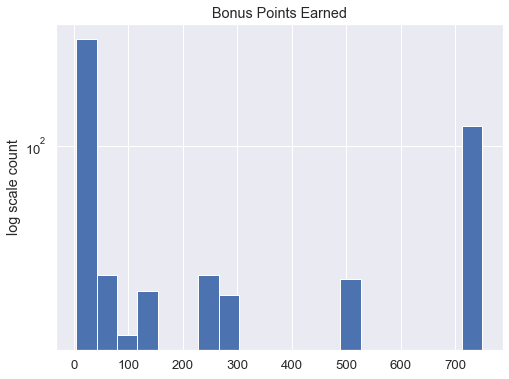

In [22]:
plt.hist(receipts['bonusPointsEarned'],bins=20)
plt.yscale('log')
plt.ylabel('log scale count')
plt.title('Bonus Points Earned')

Text(0.5, 1.0, 'Points Earned')

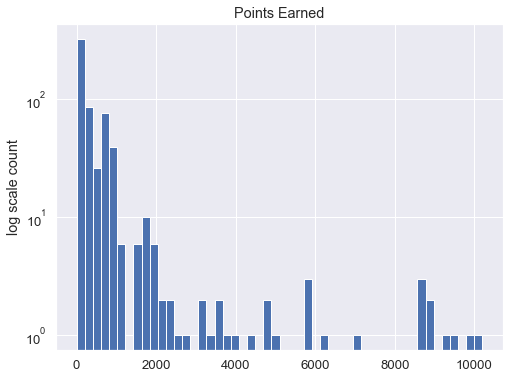

In [23]:
plt.hist(receipts['pointsEarned'],bins=50)
plt.yscale('log')
plt.ylabel('log scale count')
plt.title('Points Earned')

In [24]:
# Investigate the outliers (mostly already flagged)
receipts[receipts['pointsEarned'] > 8000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
12,5ff1e1b60a7214ada100055c,150.00,"Receipt number 5 completed, bonus point schedu...",2021-01-03,2021-01-03,NaN,2021-01-03,NaN,8850.00,2021-02-03,10.00,FLAGGED,290.00,5ff1e194b6a9d73a3a9f1052
78,5fa5ad370a720f05ef000089,750.00,"Receipt number 1 completed, bonus point schedu...",2020-11-06,2020-11-06,2021-01-05,2021-01-05,2021-01-05,9449.80,2020-11-05,11.00,FINISHED,291.00,5fa5ad376a26f611e71ab5ef
139,5ff73be10a7214ada1000619,NaN,NaN,2021-01-07,2021-01-07,NaN,2021-01-07,NaN,8700.00,2021-02-07,10.00,FLAGGED,290.00,5ff73b90eb7c7d31ca8a452b
158,5ff873f10a720f052300064f,500.00,"Receipt number 2 completed, bonus point schedu...",2021-01-08,2021-01-08,NaN,2021-01-08,NaN,9200.00,2021-02-08,10.00,FLAGGED,290.00,5ff873d1b3348b11c9337716
190,5ffcb4900a720f0515000002,250.00,"Receipt number 3 completed, bonus point schedu...",2021-01-11,2021-01-11,NaN,2021-01-11,NaN,8950.00,2021-02-11,10.00,FLAGGED,290.00,5ffcb47d04929111f6e9256c
265,5fff26f10a7214ad4c000018,NaN,NaN,2021-01-13,2021-01-13,NaN,2021-01-13,NaN,8700.00,2021-02-13,10.00,FLAGGED,290.00,5fff2698b3348b03eb45bb10
294,6000d4bc0a7214ad4c000070,NaN,NaN,2021-01-14,2021-01-14,NaN,2021-01-14,NaN,8700.00,2021-02-14,10.00,FLAGGED,290.00,6000d46cfb296c121a81b20c
374,60088d580a7214ad890000eb,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-20,2021-01-20,2021-01-20,2021-01-20,2021-01-20,9850.00,2021-01-20,7.00,FINISHED,26.00,60088d58633aab121bb8e424
492,6011f3490a7214ada200010e,5.00,All-receipts receipt bonus,2021-01-27,2021-01-27,2021-01-27,2021-01-27,2021-01-27,10199.80,2021-01-26,2.00,FINISHED,11.00,6011f31ea4b74c18d3a8c476


Text(0.5, 1.0, 'Purchased Item Count')

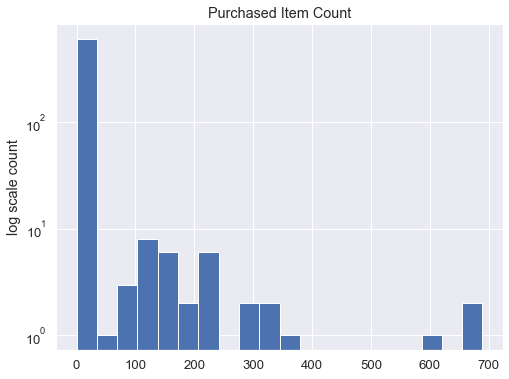

In [25]:
plt.hist(receipts['purchasedItemCount'],bins=20)
plt.yscale('log')
plt.ylabel('log scale count')
plt.title('Purchased Item Count')

In [26]:
# Investigate the outliers
receipts[receipts['purchasedItemCount'] > 600]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
469,600f39c30a7214ada2000030,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-25,2021-01-25,2021-01-26,2021-01-26,2021-01-26,7137.20,2021-01-24,670.00,FINISHED,4721.95,600f35015edb782098e2ac1b
543,600f2fc80a720f0535000030,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-25,2021-01-25,2021-01-25,2021-01-28,2021-01-25,4944.70,2021-01-24,689.00,FINISHED,4566.17,600f29a64329897eac239049


In [27]:
# Take a look at one of the order that purchased more than 600 items
items[items['receiptId'] == '600f2fc80a720f0535000030']['description'].value_counts()

Kraft Macaroni & Cheese Dinner - The Cheesiest Original     21
COMP BOOK                                                   19
PC PCKT WALLET                                              15
BEN AND JERRYS ICE CREAM                                    12
PC IMPULSE                                                   9
                                                            ..
Jalapeno Peppers                                             1
FRSH EXP S                                                   1
Raspberries                                                  1
DIET PEPSI SODA COLA CAN IN FRIDGE PCK BX 12 CT 144 OZ       1
KRST PLN PWDR SFD CHCK PRK RDY TO USE CTNG MIX BOX 20 OZ     1
Name: description, Length: 275, dtype: int64

Text(0.5, 1.0, 'Total Spent')

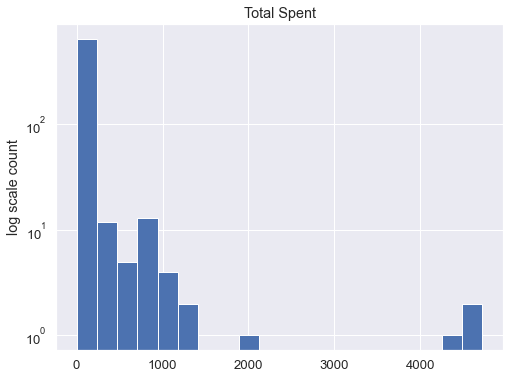

In [28]:
plt.hist(receipts['totalSpent'],bins=20)
plt.yscale('log')
plt.ylabel('log scale count')
plt.title('Total Spent')

In [29]:
# Investigate the outliers (Same outliers for purchasedItemCount)
receipts[receipts['totalSpent'] > 4000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
446,600f24970a720f053500002f,NaN,NaN,2021-01-25,2021-01-25,NaN,2021-01-25,NaN,NaN,2021-01-25,599.00,FLAGGED,4368.80,600f20c15edb787dce060911
469,600f39c30a7214ada2000030,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-25,2021-01-25,2021-01-26,2021-01-26,2021-01-26,7137.20,2021-01-24,670.00,FINISHED,4721.95,600f35015edb782098e2ac1b
543,600f2fc80a720f0535000030,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-25,2021-01-25,2021-01-25,2021-01-28,2021-01-25,4944.70,2021-01-24,689.00,FINISHED,4566.17,600f29a64329897eac239049


Text(0.5, 1.0, 'Bonus Points Earned Reason')

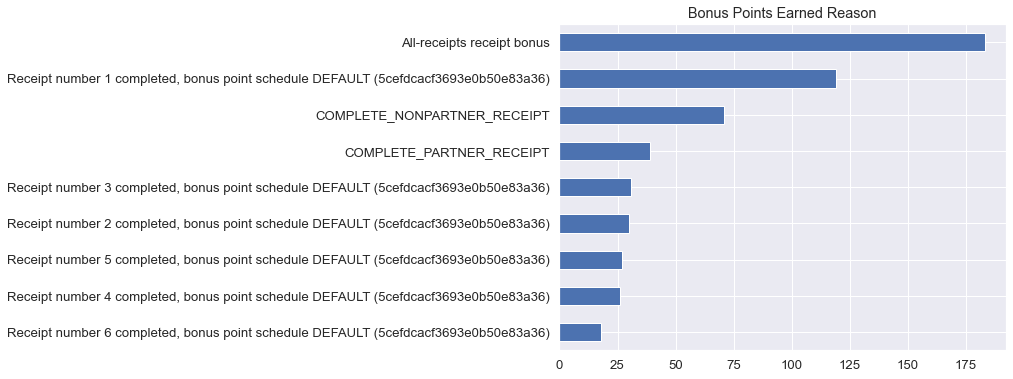

In [30]:
receipts['bonusPointsEarnedReason'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Bonus Points Earned Reason')

Text(0.5, 1.0, 'Rewards Receipt Status')

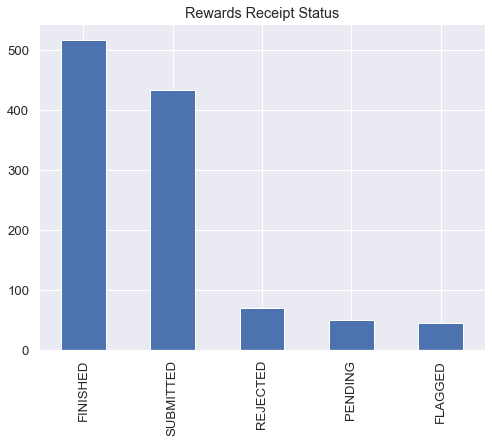

In [31]:
receipts['rewardsReceiptStatus'].value_counts().plot(kind = 'bar')
plt.title('Rewards Receipt Status')

Text(0.5, 1.0, 'Top 20 users')

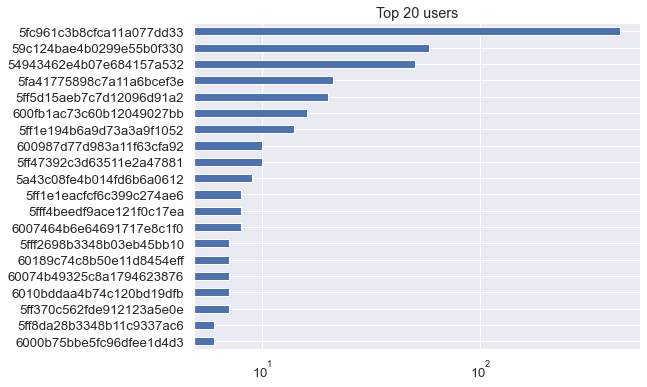

In [32]:
receipts['userId'].value_counts().head(20).sort_values().plot(kind = 'barh')
plt.xscale('log')
plt.title('Top 20 users')

(array([18567., 18581., 18597., 18611., 18628., 18642., 18659., 18673.,
        18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

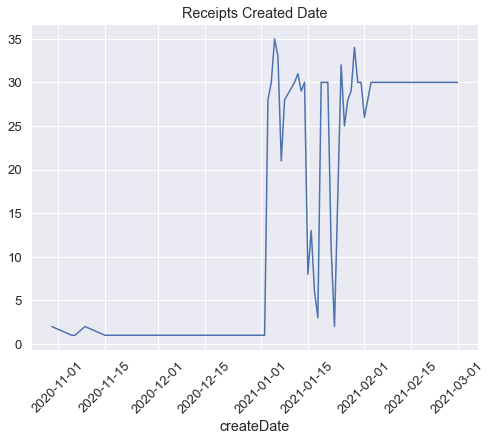

In [33]:
receipts.groupby('createDate')['_id'].count().plot(title = 'Receipts Created Date')
plt.xticks(rotation=45)

(array([18567., 18581., 18597., 18611., 18628., 18642., 18659., 18673.,
        18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

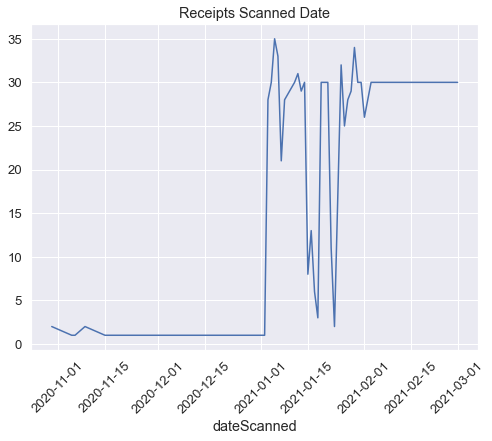

In [34]:
receipts.groupby('dateScanned')['_id'].count().plot(title = 'Receipts Scanned Date')
plt.xticks(rotation=45)

(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383., 18506., 18628., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

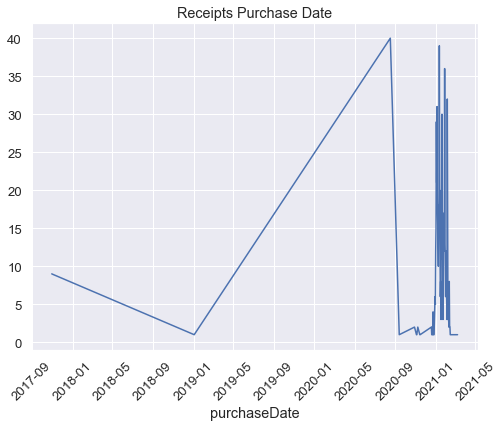

In [35]:
receipts.groupby('purchaseDate')['_id'].count().plot(title = 'Receipts Purchase Date')
plt.xticks(rotation=45)

In [38]:
# Investigate the order before 2020-10-01 (all already rejected)
receipts[receipts['purchaseDate'] < pd.to_datetime('2020-10-01')]

/Users/xiaoxian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
28,5ff1e1d40a7214ada1000562,NaN,NaN,2021-01-03,2021-01-03,NaN,2021-01-03,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,5ff1e194b6a9d73a3a9f1052
62,5ff4a4ca0a7214ada10005d0,750.00,"Receipt number 1 completed, bonus point schedu...",2021-01-05,2021-01-05,NaN,2021-01-05,NaN,750.00,2020-09-13,2.00,REJECTED,34.96,5fbc35711d967d1222cbfefc
195,5ffc9dc60a7214adca00005a,NaN,NaN,2021-01-11,2021-01-11,NaN,2021-01-11,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,5ffc9d87b3348b11c9338920
277,6000d4d30a720f05f3000081,NaN,NaN,2021-01-14,2021-01-14,NaN,2021-01-14,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,6000d46cfb296c121a81b20c
369,6008878f0a7214ad8900007b,NaN,NaN,2021-01-20,2021-01-20,NaN,2021-01-20,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,6008873eb6310511daa4e8eb
371,60088d920a720f05fa000109,NaN,NaN,2021-01-20,2021-01-20,NaN,2021-01-20,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,60088d55633aab121bb8e41a
498,60118c3b0a7214ada2000089,NaN,NaN,2021-01-27,2021-01-27,NaN,2021-01-27,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,60118bcfa4b74c18d3a8c0d7
511,6010be460a7214ada2000066,NaN,NaN,2021-01-27,2021-01-27,NaN,2021-01-27,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,6010bddaa4b74c120bd19dfb
660,601830a70a7214ad500002d3,NaN,NaN,2021-02-01,2021-02-01,NaN,2021-02-01,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,60183090c8b50e11d84549c0
692,60189cb40a720f05f4000060,NaN,NaN,2021-02-02,2021-02-02,NaN,2021-02-02,NaN,NaN,2017-10-30,3.00,REJECTED,3.00,60189c74c8b50e11d8454eff


###  Communicate with Stakeholders

Hello,

Hope this email finds you well.

I am writing this email to give you an update on recent work on the sample data files in order to make sure I am on the right track. Firstly, I cleaned the unstructured data using Python and built a structured relational data model. Then I noticed some quality issues and might need you help with:

- In the receipts table, reward points, item count and total spent, which are necessary components of receipts, have lots of values missing. Could you let me know the reasons why they are missing?
- I noticed some outliers (e.g., item count > 600, total spent > $4,000, reward points > 8,000) and took a deeper look at the records, only to find most of them have been flagged or rejected. So, I think it might not be a problem.
- Most receipts in the sample data were scanned between Jan 2021 to Mar 2021. However, I noticed that is a sharp drop on 2021-01-18 and 2021-01-23. I would like to know whether the data anomaly is due to data logging issues or other external reasons.
- For the items on the receipts, only 44% of barcode is populated while partneritemId is 100% populated. Therefore, I am considering using partneritemId as identifier for items and I would like to get access to the partner product table and add to the relational data model if possible.
- In the brands table, the _id, barcode, brandCode and cpg_id are a little bit confusing to me. I would greatly appreciate if you could provide more info on what they refer to. 
- In the users table, there are more than half of the records are duplicate. I suggest they should be removed; otherwise, space and computation ability are wasted with scaling in production.

Please let me know if you have any other questions. Happy to schedule a meeting if you have the time.

Thanks,

Sherry
